# Youtube popularity predictor (Part 1): exploratory data analysis

I collected 6 years of video metadata via a YouTube API search request for the keyword "science," which can be found in the file "video_metadata.csv" in the "data" folder. In this notebook I will perform exploratory data analysis to gain insight into how a language model might be constructed to predict the video statistics. First let's load the data and check the dtypes:

In [36]:
%matplotlib inline

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
video_metadata = pd.read_csv('https://raw.githubusercontent.com/tommyliphysics/tommyli-ml/main/youtube_predictor/data/video_metadata_v2.csv', lineterminator='\n')
video_metadata

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date
0,rEBDdAjdmgs,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515137e+09,Master of Science in Cellular and Molecular Bi...,"Christina Zito, assistant professor and coordi...",27,4080.0,0.0,51.0,NaN,https://i.ytimg.com/vi/rEBDdAjdmgs/hqdefault.jpg,NaN,2024-05-10 12:10:04.285457
1,f5niOzsXqDY,PennWest California,UCj_5YtCUEitd1ImDOgiiKsw,1.514873e+09,Faculty Showcase: Dr. Ben Reuter - Exercise Sc...,Interested in pursing a exercise science degre...,27,1473.0,0.0,6.0,NaN,https://i.ytimg.com/vi/f5niOzsXqDY/hqdefault.jpg,exercise science graduate degree|graduate degr...,2024-05-10 12:10:04.409194
2,csBbih58MjI,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515143e+09,Master of Science in Mechanical Engineering: B...,The University of New Haven’s master’s degree ...,27,2801.0,0.0,13.0,NaN,https://i.ytimg.com/vi/csBbih58MjI/hqdefault.jpg,NaN,2024-05-10 12:10:04.531977
3,bkheTYBXI-U,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.515181e+09,Science for kids | BROKEN BONES- Unluckiest K...,Learn about Broken Bones with the Unluckiest K...,24,4017367.0,0.0,11024.0,NaN,https://i.ytimg.com/vi/bkheTYBXI-U/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:04.654139
4,WZ7w5SwhN7k,Crazy GkTrick,UCIl28Ab-H-3LYIPw4hhQexA,1.514691e+09,Science Gk : Diseases (मानव रोग ) - Part-2,Biology (‎जीव विज्ञान) | Gk Science | Science ...,27,2566372.0,1673.0,62388.0,NaN,https://i.ytimg.com/vi/WZ7w5SwhN7k/hqdefault.jpg,science quiz|biology quiz|biology questions|ge...,2024-05-10 12:10:04.782682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31657,GVfRdbXBuh8,Morinda Enterprises,UC7eUnLwyojE5cLcrXJ_BLzg,1.711428e+09,Vivo v30pro pro photography // aura light por...,NaN,22,342.0,0.0,20.0,NaN,https://i.ytimg.com/vi/GVfRdbXBuh8/hqdefault.jpg,NaN,2024-05-10 14:14:48.679394
31658,4ijjfSP6pBo,Christian Dunham,UCeXF8Kfs8nh4h7IwYgq051g,1.711814e+09,POV me growing up,NaN,20,10.0,NaN,0.0,NaN,https://i.ytimg.com/vi/4ijjfSP6pBo/hqdefault.jpg,NaN,2024-05-10 14:14:48.808758
31659,BEM8c1R9I7s,Gegee gegee,UCHgzxRnIrRN190N86tNC_cg,1.711583e+09,28 March 2024,NaN,22,3.0,NaN,1.0,NaN,https://i.ytimg.com/vi/BEM8c1R9I7s/hqdefault.jpg,NaN,2024-05-10 14:14:48.938653
31660,2F0HHGYczk4,Sangita . 20k views. 2 days ago,UCvqqcsQ7uiKQvuUivw5Zglw,1.711393e+09,TLM WORKSHOP on FLN ||👏😱||#viral #tlm,"project work,tlm workshop,maths project work,t...",27,27.0,0.0,5.0,NaN,https://i.ytimg.com/vi/2F0HHGYczk4/hqdefault.jpg,tlm|easy tlms|tlm workshop,2024-05-10 14:14:49.073749


First, let's check for duplicates:

In [39]:
video_metadata.duplicated(subset='video_id').sum()

0

Next we can check the data types for each column:

In [40]:
video_metadata.dtypes

video_id                object
channel_title           object
channel_id              object
video_publish_date     float64
video_title             object
video_description       object
video_category           int64
video_view_count       float64
video_comment_count    float64
video_like_count       float64
video_dislike_count    float64
video_thumbnail         object
video_tags              object
collection_date         object
dtype: object

We see a mix of numerical data and text features. YouTube disabled video dislikes in November 2021, so the measures of video popularity we will be interested in are the view, comment and like counts. The text features will be the video and channel title and the video desription. Let's take a look at a sample of these:

In [41]:
for idx in video_metadata.sample(5, random_state=40).index:
    print("Channel title: \n\t", video_metadata.at[idx, 'channel_title'])
    print("Video title: \n\t", video_metadata.at[idx, 'video_title'])
    print("Video description: \n\t", video_metadata.at[idx, 'video_description'])
    print(f"Views/likes/comments: {video_metadata.at[idx, 'video_view_count']}/{video_metadata.at[idx, 'video_like_count']}/{video_metadata.at[idx, 'video_comment_count']}")

Channel title: 
	 Dee. M Patel Sir
Video title: 
	 Basic chemistry concept || સમીકરણ કેવી રીતે બને? || std 10 science ch 1 | #elements | periodic table
Video description: 
	 Basic chemistry concept || સમીકરણ કેવી રીતે બને? || std 10 science ch 1 | #elements | periodic table

#basicchemistry
#std10science
#elements

about this video :
this is the best video for how to make a #chemicaiequation' if students have a truble for make it.aa video dwara vidhyarthi 1 to 20 tatvo ni samaj melvi teni electron rachna sikhi sakse.

about this channel :
આ ચેનલ ઉપર રોજ સવારે 8:45 વિડીયો અપલોડ થાય છે જેમાં ધોરણ10નુ વિજ્ઞાન, કેટલાક પ્રયોગો અને સાથે સાથે વિદ્યાર્થીઓ દ્વારા અપાયેલા મોટીવેશનલ રીવ્યુને અપલોડ કરીએ છીએ.

other experiment video playlist :

https://www.youtube.com/playlist?list=PLlQG1EXSq-aCmSyFuuR_TUzzjqyORoJW0

channel name : Dee_MPatel

----------------------------------------------------------------------------------------------------------------------------------------------------------

O

Let's look at the video categories:

In [42]:
video_metadata.groupby('video_category')[['video_view_count', 'video_like_count', 'video_comment_count']].describe()

video_view_count                                              \
                          count          mean           std   min       25%   
video_category                                                                
1                         306.0  2.058352e+06  6.476855e+06   2.0    669.25   
2                         179.0  1.382481e+06  5.874453e+06   0.0    835.00   
10                        245.0  1.741368e+06  1.157911e+07   2.0   5228.00   
15                         41.0  1.321757e+07  5.161655e+07  34.0   1174.00   
17                        487.0  5.553212e+05  4.155827e+06   7.0    863.50   
19                        111.0  6.994941e+05  3.209220e+06   4.0   1851.50   
20                        603.0  1.338352e+06  8.398524e+06   0.0    124.50   
22                       5831.0  6.519852e+05  5.068741e+06   0.0    257.50   
23                        220.0  4.868283e+06  1.705172e+07   1.0  11488.50   
24                       1382.0  2.928317e+06  1.348788e+07   0.0   4345.25   
25                        499.0  1.957999e+06  1.742192e+07   2.0    587.50   
26                        570.0  2.138300e+06  7.283249e+06   0.0  11185.00   
27                      17384.0  4.820291e+05  4.879540e+06   0.0   5308.75   
28                       3636.0  1.683867e+06  8.569634e+06   0.0   2073.50   
29                        167.0  1.807517e+05  9.452418e+05   9.0    409.00   
30                          0.0           NaN           NaN   NaN       NaN   

                                                  video_like_count  \
                     50%         75%          max            count   
video_category                                                       
1                18737.0   472818.00   56619245.0            303.0   
2                30309.0   400885.00   67816733.0            167.0   
10               89862.0   442196.00  171688824.0            241.0   
15               26999.0   699665.00  262772044.0             37.0   
17                4226.0    46283.50   68701459.0            476.0   
19               13675.0   102489.00   30657189.0            107.0   
20               21990.0   598192.00  152516065.0            583.0   
22                4570.0    42635.00  159577056.0           5658.0   
23              328430.0  2809413.25  168755332.0            218.0   
24               61030.0   973132.50  311953984.0           1336.0   
25                4295.0    45842.00  289949872.0            482.0   
26              110135.5   711616.25   98257632.0            559.0   
27               30937.0   145864.25  387863350.0          16687.0   
28               33002.0   505436.50  187110777.0           3505.0   
29                3037.0    36858.00   10350329.0            155.0   
30                   NaN         NaN          NaN              1.0   

                               ...                      video_comment_count  \
                         mean  ...       75%        max               count   
video_category                 ...                                            
1                36923.656766  ...   8692.50  1008244.0               294.0   
2                29814.365269  ...   9324.00   803837.0               177.0   
10               22955.659751  ...   9710.00  1158837.0               237.0   
15               17872.054054  ...   9714.00   357680.0                34.0   
17               11930.281513  ...    860.25  1735000.0               477.0   
19               10507.364486  ...   1656.50   348740.0               107.0   
20               33356.802744  ...   9994.50  2310454.0               577.0   
22               15343.889890  ...    891.50  4679567.0              5321.0   
23              161983.220183  ...  88228.25  3704788.0               217.0   
24               67599.679641  ...  20855.00  5835790.0              1277.0   
25                9783.790456  ...    677.50   829284.0               467.0   
26               33019.007156  ...   8776.50  4693422.0               556.0 

## Time evolution of YT statistics

We'll begin our analysis by observing how measures of popularity vary over time. Since the metadata does not include the historical view, like and comment counts over the entire time period that the video has been public, we will instead study how the current statistics, which have been accumulated over the lifetime of the video, vary with the publication date as a proxy. First, we're going to add a new column to the data for the number of months since the publication of the video (to April 2024):

In [43]:
import datetime

# months between the publication of the video and April 2024
def get_months_since_publication(timestamp, verbose=False):
    dt = datetime.datetime.fromtimestamp(timestamp)
    if verbose:
        print(f"{dt.day}/{dt.month}/{dt.year} {dt.hour}:{dt.minute}:{dt.second}")
    return 16 - dt.month + 12*(2023 - dt.year)

In [44]:
video_metadata['months'] = video_metadata['video_publish_date'].apply(get_months_since_publication)
video_metadata

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,months
0,rEBDdAjdmgs,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515137e+09,Master of Science in Cellular and Molecular Bi...,"Christina Zito, assistant professor and coordi...",27,4080.0,0.0,51.0,NaN,https://i.ytimg.com/vi/rEBDdAjdmgs/hqdefault.jpg,NaN,2024-05-10 12:10:04.285457,75
1,f5niOzsXqDY,PennWest California,UCj_5YtCUEitd1ImDOgiiKsw,1.514873e+09,Faculty Showcase: Dr. Ben Reuter - Exercise Sc...,Interested in pursing a exercise science degre...,27,1473.0,0.0,6.0,NaN,https://i.ytimg.com/vi/f5niOzsXqDY/hqdefault.jpg,exercise science graduate degree|graduate degr...,2024-05-10 12:10:04.409194,75
2,csBbih58MjI,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515143e+09,Master of Science in Mechanical Engineering: B...,The University of New Haven’s master’s degree ...,27,2801.0,0.0,13.0,NaN,https://i.ytimg.com/vi/csBbih58MjI/hqdefault.jpg,NaN,2024-05-10 12:10:04.531977,75
3,bkheTYBXI-U,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.515181e+09,Science for kids | BROKEN BONES- Unluckiest K...,Learn about Broken Bones with the Unluckiest K...,24,4017367.0,0.0,11024.0,NaN,https://i.ytimg.com/vi/bkheTYBXI-U/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:04.654139,75
4,WZ7w5SwhN7k,Crazy GkTrick,UCIl28Ab-H-3LYIPw4hhQexA,1.514691e+09,Science Gk : Diseases (मानव रोग ) - Part-2,Biology (‎जीव विज्ञान) | Gk Science | Science ...,27,2566372.0,1673.0,62388.0,NaN,https://i.ytimg.com/vi/WZ7w5SwhN7k/hqdefault.jpg,science quiz|biology quiz|biology questions|ge...,2024-05-10 12:10:04.782682,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31657,GVfRdbXBuh8,Morinda Enterprises,UC7eUnLwyojE5cLcrXJ_BLzg,1.711428e+09,Vivo v30pro pro photography // aura light por...,NaN,22,342.0,0.0,20.0,NaN,https://i.ytimg.com/vi/GVfRdbXBuh8/hqdefault.jpg,NaN,2024-05-10 14:14:48.679394,1
31658,4ijjfSP6pBo,Christian Dunham,UCeXF8Kfs8nh4h7IwYgq051g,1.711814e+09,POV me growing up,NaN,20,10.0,NaN,0.0,NaN,https://i.ytimg.com/vi/4ijjfSP6pBo/hqdefault.jpg,NaN,2024-05-10 14:14:48.808758,1
31659,BEM8c1R9I7s,Gegee gegee,UCHgzxRnIrRN190N86tNC_cg,1.711583e+09,28 March 2024,NaN,22,3.0,NaN,1.0,NaN,https://i.ytimg.com/vi/BEM8c1R9I7s/hqdefault.jpg,NaN,2024-05-10 14:14:48.938653,1
31660,2F0HHGYczk4,Sangita . 20k views. 2 days ago,UCvqqcsQ7uiKQvuUivw5Zglw,1.711393e+09,TLM WORKSHOP on FLN ||👏😱||#viral #tlm,"project work,tlm workshop,maths project work,t...",27,27.0,0.0,5.0,NaN,https://i.ytimg.com/vi/2F0HHGYczk4/hqdefault.jpg,tlm|easy tlms|tlm workshop,2024-05-10 14:14:49.073749,1


In [45]:
video_metadata.groupby('months')[['video_view_count','video_like_count','video_comment_count']].describe()

video_view_count                                                        \
                  count          mean           std   min       25%       50%   
months                                                                          
-1                  4.0  1.172250e+03  1.592752e+03  14.0    113.00     610.5   
 1                714.0  6.898932e+05  3.351005e+06   0.0   2227.00   60168.5   
 2                472.0  1.682569e+06  6.947060e+06   0.0    752.00  137948.0   
 3                419.0  1.348220e+06  3.774833e+06   0.0    438.50  182567.0   
 4                439.0  2.006574e+06  5.971465e+06   1.0   2521.50  148724.0   
 5                390.0  2.509216e+06  1.167502e+07   1.0    729.00  123548.5   
 6                429.0  1.306697e+06  4.756662e+06   0.0    588.00   85963.0   
 7                452.0  1.019015e+06  3.659329e+06   0.0    272.50   80070.0   
 8                461.0  1.384831e+06  5.576947e+06   0.0    588.00   97082.0   
 9                413.0  1.185568e+06  8.604252e+06   0.0    354.00   47234.0   
 10               498.0  1.228088e+06  6.470822e+06   0.0   1476.50   75764.5   
 11               526.0  1.996155e+06  1.386101e+07   1.0  16766.25  152322.5   
 12               411.0  1.574184e+06  9.312996e+06   0.0   1640.50  146108.0   
 13               474.0  9.322051e+05  3.022941e+06   0.0   1033.50  124933.0   
 14               504.0  1.533435e+06  9.117559e+06   0.0    681.25   67216.0   
 15               499.0  1.146674e+06  4.333203e+06   0.0   1793.50  109142.0   
 16               475.0  1.160628e+06  5.078601e+06   0.0    405.50  103298.0   
 17               535.0  1.759122e+06  9.025895e+06   0.0   8334.50   71422.0   
 18               456.0  1.963457e+06  1.389390e+07   2.0  23794.50  107702.5   
 19               483.0  1.629729e+06  9.030300e+06   1.0    404.50   76515.0   
 20               500.0  1.671063e+06  1.204464e+07   0.0  15487.50   94187.0   
 21               508.0  1.330149e+06  7.564736e+06   0.0   2183.00   94388.5   
 22               360.0  1.180124e+06  5.789251e+06   0.0   3895.25   18766.5   
 23               436.0  1.070425e+06  5.960200e+06   1.0   3585.00   14713.5   
 24               342.0  1.256116e+06  8.148279e+06   5.0   4568.75   18087.0   
 25               425.0  8.212618e+05  3.401870e+06   5.0   6337.00   20987.0   
 26               364.0  1.314568e+06  5.565569e+06   6.0   7963.00   30947.5   
 27               412.0  2.218538e+06  1.787800e+07   3.0   8576.75   40837.5   
 28               469.0  1.006831e+06  7.799780e+06  15.0   7173.00   27553.0   
 29               379.0  1.395363e+06  1.633394e+07   3.0   6868.00   25035.0   
 30               424.0  8.671348e+05  7.453837e+06   1.0   7553.50   26357.0   
 31               404.0  5.036488e+05  2.948094e+06   0.0   3885.75   18053.5   
 32               469.0  4.654521e+05  4.744568e+06   1.0   5668.00   17373.0   
 33               373.0  2.766938e+05  1.883172e+06  11.0   7899.00   28125.0   
 34               468.0  2.696363e+05  1.459330e+06   4.0   2158.50   12255.5   
 35               402.0  6.017958e+05  4.278406e+06  19.0   4984.25   18485.5   
 36               438.0  6.452607e+05  6.367254e+06  13.0   4914.75   19252.0   
 37               348.0  5.628823e+05  3.778770e+06   0.0   6331.25   21507.5   
 38               382.0  2.139848e+05  9.441935e+05   0.0   5029.75   21131.0   
 39               461.0  3.644898e+05  4.449439e+06   0.0   5969.00   16480.0   
 40               438.0  2.580962e+05  1.437052e+06   3.0   4387.00   23906.0   
 41               347.0  2.531476e+05  9.382368e+05   8.0   6656.00   26663.0   
 42               428.0  2.362406e+05  8.364395e+05   7.0   5599.00   23067.5   
 43               423.0  7.726915e+05  7.106052e+06   2.0   6462.50   18688.0   
 44               398.0  4.843429e+05  4.282825e+06  29.0   7583.50   26419.0   
 45               416.0  3.810348e+05  2.435906e+06  10.0   5693.50   22376.5   
 46               451.0  1.685828e+05 

For youtube content creators, milestones like 10k, 100k and 1M views are highly significant. We can plot the number of videos published within the same month which have reached these milestones since publication:

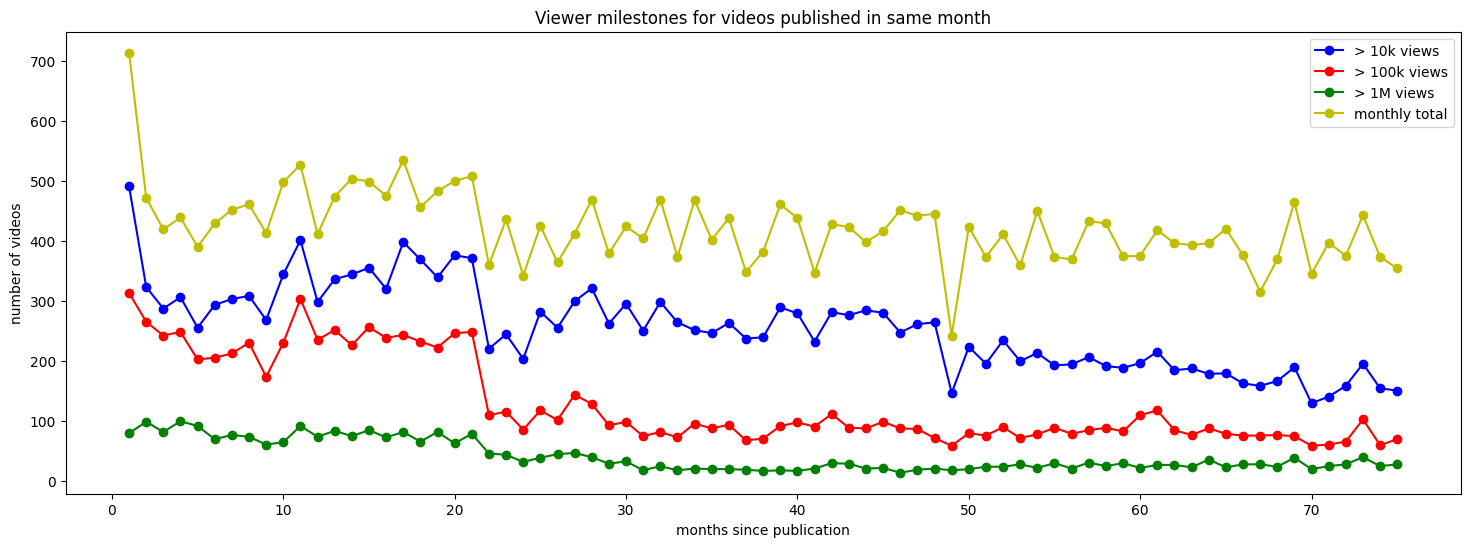

In [46]:
import matplotlib.pyplot as plt

monthly_total = []
over_10k_views = []
over_100k_views = []
over_1M_views = []
months_range = np.arange(1, 76, 1)

for month in months_range:
    monthly_total.append(len(video_metadata[(video_metadata['months']==month)]))
    over_10k_views.append(len(video_metadata[(video_metadata['months']==month) & (video_metadata['video_view_count'] > 10000)]))
    over_100k_views.append(len(video_metadata[(video_metadata['months']==month) & (video_metadata['video_view_count'] > 100000)]))
    over_1M_views.append(len(video_metadata[(video_metadata['months']==month) & (video_metadata['video_view_count'] > 1000000)]))

fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Viewer milestones for videos published in same month')
ax.set_xlabel('months since publication')
ax.set_ylabel('number of videos')
ax.set_xscale('linear')
ax.set_yscale('linear')

_= ax.plot(months_range, over_10k_views, 'bo-', label='> 10k views')
_= ax.plot(months_range, over_100k_views, 'ro-', label='> 100k views')
_= ax.plot(months_range, over_1M_views, 'go-', label='> 1M views')
_= ax.plot(months_range, monthly_total, 'yo-', label='monthly total')

ax.legend()
plt.show()

We can also plot the number of videos that have reached these milestones as a percentage of the monthly total:

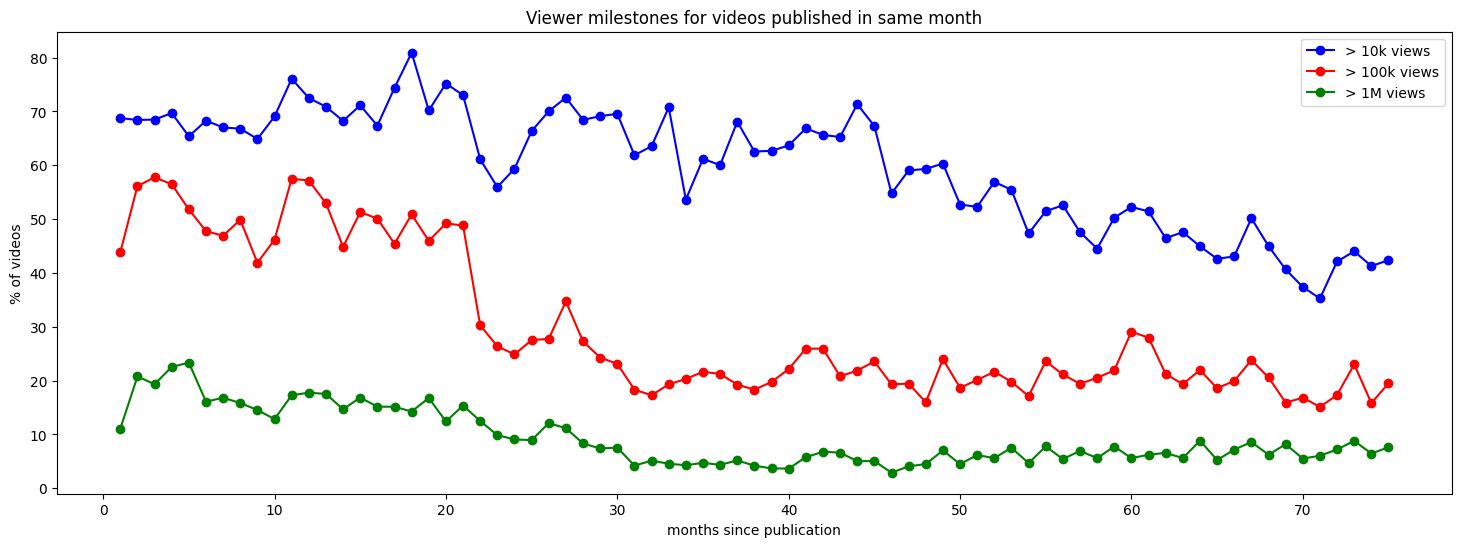

In [47]:
import numpy as np
monthly_total = np.array(monthly_total)
over_10k_views = np.array(over_10k_views)
over_100k_views = np.array(over_100k_views)
over_1M_views = np.array(over_1M_views)

fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Viewer milestones for videos published in same month')
ax.set_xlabel('months since publication')
ax.set_ylabel('% of videos')
ax.set_xscale('linear')
ax.set_yscale('linear')

_= ax.plot(months_range, over_10k_views*100/monthly_total, 'bo-', label='> 10k views')
_= ax.plot(months_range, over_100k_views*100/monthly_total, 'ro-', label='> 100k views')
_= ax.plot(months_range, over_1M_views*100/monthly_total, 'go-', label='> 1M views')

ax.legend()
plt.show()

We can observe that the number of videos published per month exhibits oscillatory behaviour, with peaks occurring every 3-4 months where the number of videos doubles relative to the baseline. However, the percentage of those videos hitting particular milestones is a significantly more consistent. Another way to track the statistics over time is by percentile. Let's look at how the percentiles dividing the top, middle and bottom third of video by views evolve with time:

In [48]:
view_mins = []
view_medians = []
view_maxes = []
view_t1s = []
view_t2s = []

for month in months_range:
    view_mins.append(video_metadata[video_metadata['months']==month]['video_view_count'].min())
    view_medians.append(video_metadata[video_metadata['months']==month]['video_view_count'].quantile(1/2))
    view_maxes.append(video_metadata[video_metadata['months']==month]['video_view_count'].max())
    view_t1s.append(video_metadata[video_metadata['months']==month]['video_view_count'].quantile(1/3))
    view_t2s.append(video_metadata[video_metadata['months']==month]['video_view_count'].quantile(2/3))

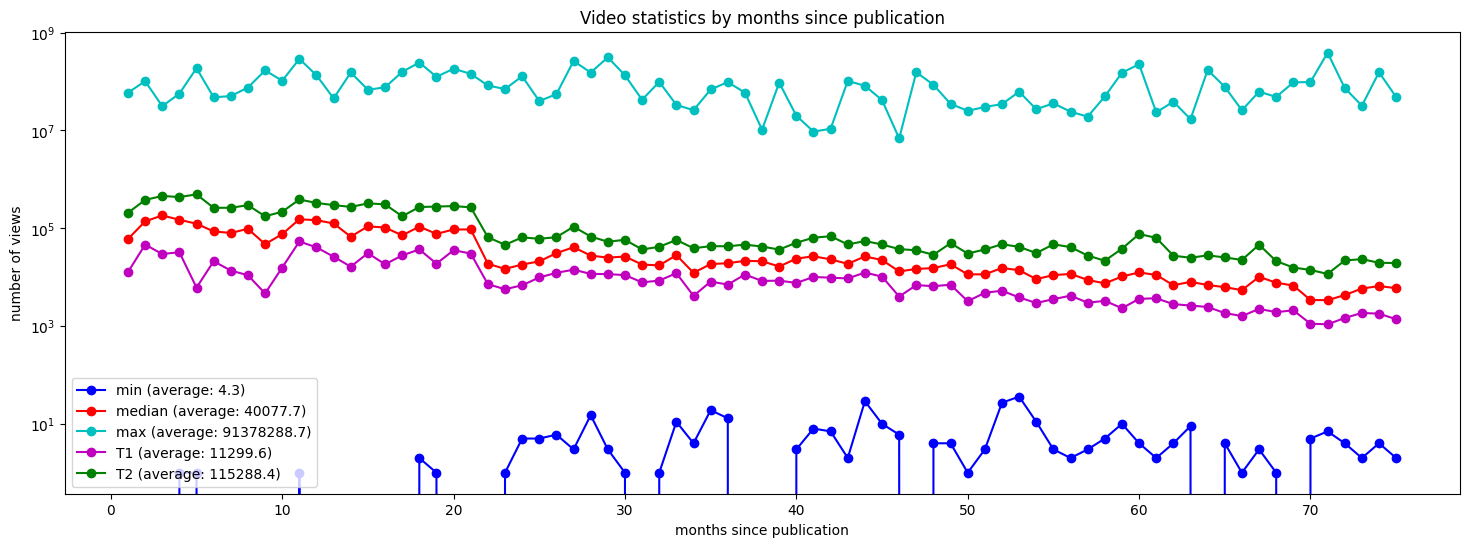

In [49]:
fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Video statistics by months since publication')
ax.set_xlabel('months since publication')
ax.set_ylabel('number of views')
ax.set_xscale('linear')
ax.set_yscale('log')

_= ax.plot(months_range, view_mins, 'bo-', label=f'min (average: {np.mean(view_mins) :.1f})')
_= ax.plot(months_range, view_medians, 'ro-', label=f'median (average: {np.mean(view_medians) :.1f})')
_= ax.plot(months_range, view_maxes, 'co-', label=f'max (average: {np.mean(view_maxes) :.1f})')
_= ax.plot(months_range, view_t1s, 'mo-', label=f'T1 (average: {np.mean(view_t1s) :.1f})')
_= ax.plot(months_range, view_t2s, 'go-', label=f'T2 (average: {np.mean(view_t2s) :.1f})')

ax.legend()
plt.show()

We can see that the monthly values of the 33rd, 50th and 67th percentiles are the most stable of the measures we have seen so far. On average, a third of all videos have between 20,000 and 150,000 views. In this project I will not attempt to predict the number of views: due to the bias-variance trade-off, neglecting features such as details of the YouTube channel would significantly reduce the accuracy of the model, thus we must limit the intended predictive power. I will choose the milestone of 50k views to classify the dataset, which, as we can conclude from the plotted values of the given percentiles, results in an approximately balanced division of classes. Let's add the class labels to the dataframe. I will first need to set the number to zero in case it is missing, and, since the numbers vary over many orders of magnitude, I will take the log (base 10) of all the counts:

In [50]:
video_metadata['label'] = video_metadata['video_view_count'].apply(lambda x: 1 if x > 50000 else 0)
video_metadata

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,months,label
0,rEBDdAjdmgs,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515137e+09,Master of Science in Cellular and Molecular Bi...,"Christina Zito, assistant professor and coordi...",27,4080.0,0.0,51.0,NaN,https://i.ytimg.com/vi/rEBDdAjdmgs/hqdefault.jpg,NaN,2024-05-10 12:10:04.285457,75,0
1,f5niOzsXqDY,PennWest California,UCj_5YtCUEitd1ImDOgiiKsw,1.514873e+09,Faculty Showcase: Dr. Ben Reuter - Exercise Sc...,Interested in pursing a exercise science degre...,27,1473.0,0.0,6.0,NaN,https://i.ytimg.com/vi/f5niOzsXqDY/hqdefault.jpg,exercise science graduate degree|graduate degr...,2024-05-10 12:10:04.409194,75,0
2,csBbih58MjI,University of New Haven,UCTFbIUsBGDS9TE457A1tN9w,1.515143e+09,Master of Science in Mechanical Engineering: B...,The University of New Haven’s master’s degree ...,27,2801.0,0.0,13.0,NaN,https://i.ytimg.com/vi/csBbih58MjI/hqdefault.jpg,NaN,2024-05-10 12:10:04.531977,75,0
3,bkheTYBXI-U,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.515181e+09,Science for kids | BROKEN BONES- Unluckiest K...,Learn about Broken Bones with the Unluckiest K...,24,4017367.0,0.0,11024.0,NaN,https://i.ytimg.com/vi/bkheTYBXI-U/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:04.654139,75,1
4,WZ7w5SwhN7k,Crazy GkTrick,UCIl28Ab-H-3LYIPw4hhQexA,1.514691e+09,Science Gk : Diseases (मानव रोग ) - Part-2,Biology (‎जीव विज्ञान) | Gk Science | Science ...,27,2566372.0,1673.0,62388.0,NaN,https://i.ytimg.com/vi/WZ7w5SwhN7k/hqdefault.jpg,science quiz|biology quiz|biology questions|ge...,2024-05-10 12:10:04.782682,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31657,GVfRdbXBuh8,Morinda Enterprises,UC7eUnLwyojE5cLcrXJ_BLzg,1.711428e+09,Vivo v30pro pro photography // aura light por...,NaN,22,342.0,0.0,20.0,NaN,https://i.ytimg.com/vi/GVfRdbXBuh8/hqdefault.jpg,NaN,2024-05-10 14:14:48.679394,1,0
31658,4ijjfSP6pBo,Christian Dunham,UCeXF8Kfs8nh4h7IwYgq051g,1.711814e+09,POV me growing up,NaN,20,10.0,NaN,0.0,NaN,https://i.ytimg.com/vi/4ijjfSP6pBo/hqdefault.jpg,NaN,2024-05-10 14:14:48.808758,1,0
31659,BEM8c1R9I7s,Gegee gegee,UCHgzxRnIrRN190N86tNC_cg,1.711583e+09,28 March 2024,NaN,22,3.0,NaN,1.0,NaN,https://i.ytimg.com/vi/BEM8c1R9I7s/hqdefault.jpg,NaN,2024-05-10 14:14:48.938653,1,0
31660,2F0HHGYczk4,Sangita . 20k views. 2 days ago,UCvqqcsQ7uiKQvuUivw5Zglw,1.711393e+09,TLM WORKSHOP on FLN ||👏😱||#viral #tlm,"project work,tlm workshop,maths project work,t...",27,27.0,0.0,5.0,NaN,https://i.ytimg.com/vi/2F0HHGYczk4/hqdefault.jpg,tlm|easy tlms|tlm workshop,2024-05-10 14:14:49.073749,1,0


In [51]:
print(f"Percentage of videos with > 50k views: {100*len(video_metadata[video_metadata['label']==1])/len(video_metadata):.2f}")

Percentage of videos with > 50k views: 39.46


In [52]:
def logarithmise(x):
    return 0 if x < 1 or np.isnan(x) else np.log10(x)

for col in ['video_view_count', 'video_like_count', 'video_comment_count']:
    video_metadata[col] = video_metadata[col].apply(logarithmise)

video_metadata[['video_view_count', 'video_like_count', 'video_comment_count']]

,video_view_count,video_like_count,video_comment_count
0,3.610660,1.707570,0.000000
1,3.168203,0.778151,0.000000
2,3.447313,1.113943,0.000000
3,6.603942,4.042339,0.000000
4,6.409320,4.795101,3.223496
...,...,...,...
31657,2.534026,1.301030,0.000000
31658,1.000000,0.000000,0.000000
31659,0.477121,0.000000,0.000000
31660,1.431364,0.698970,0.000000


We are now ready to investigate the correlations in the data. First, let's see how the likes, views and comments are correlated:

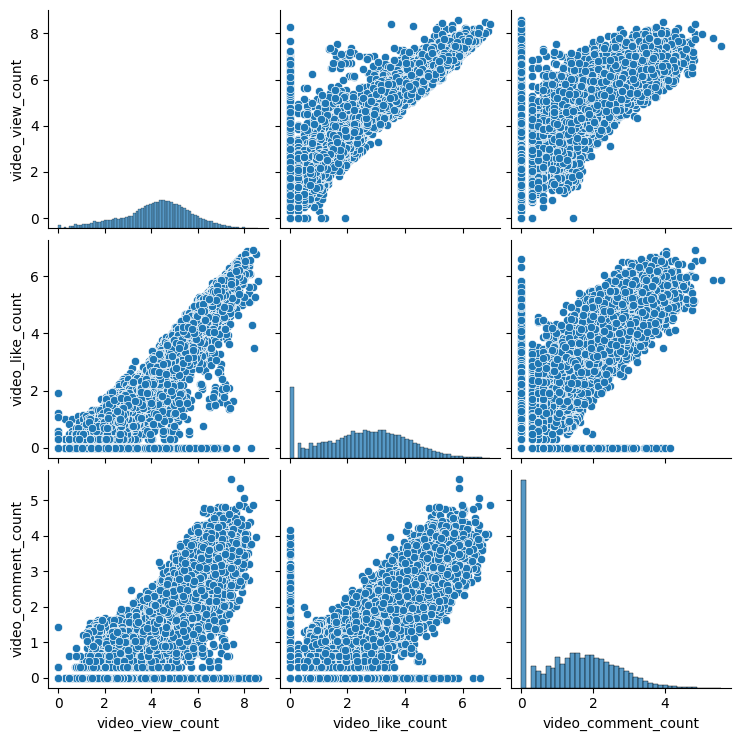

In [53]:
sns.pairplot(video_metadata[['video_view_count','video_like_count','video_comment_count']])

We see that while the views exhibit a bell curve with a fat left tail, there are more videos with less than 10 likes or comments than in any of the other bins. There is also a general positive correlation between all three statistics, however, interestingly, there seem to be a lot of highly viewed videos with low like and comment counts. Let's investigate:

In [54]:
highly_viewed_no_likes = video_metadata[(video_metadata['video_view_count']>6) & (video_metadata['video_like_count'] < 1)]
display(highly_viewed_no_likes)
print(f'Number of videos with > 1M views and no likes: {len(highly_viewed_no_likes)}')

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,months,label
1043,jBVxo5T-ZQM,Freesciencelessons,UCqbOeHaAUXw9Il7sBVG3_bw,1.521714e+09,"GCSE Biology Revision ""Required Practical 1: M...",GCSE workbooks https://www.amazon.co.uk/Dr-Sha...,27,6.081313,2.937016,0.000000,NaN,https://i.ytimg.com/vi/jBVxo5T-ZQM/hqdefault.jpg,gcse|science|revision|biology|required practic...,2024-05-10 12:12:12.974201,73,1
1062,nAUfODE25ps,Steve TV Show,UCEs-zSwH2NYGskxF-ptoT1w,1.522323e+09,8-Year-Old JoJo's Science Experiments Will Mak...,Little Big Shots' star and aspiring astronomer...,24,6.253283,2.324282,0.000000,NaN,https://i.ytimg.com/vi/nAUfODE25ps/hqdefault.jpg,STEVE|steve|comedy|funny|humor|Steve Harvey Sh...,2024-05-10 12:12:15.295105,73,1
3591,MfHuK96YBug,HD Channel,UCez_omvrfETJFkoQhSYR9Lw,1.539210e+09,Free energy generator Magnet Coil Work 100% - ...,Science Free Energy light bulbs Using Magnet C...,28,6.159564,0.000000,0.000000,NaN,https://i.ytimg.com/vi/MfHuK96YBug/hqdefault.jpg,electricity|free energy|how to make|free|energ...,2024-05-10 12:17:23.811645,66,1
4524,wlJEGJvI1UA,Sentara Health,UCk3DhV00o_q_FinKXr3GZgA,1.545377e+09,The Science of How the Body Heals Itself with ...,Dr. Li is an international expert in health an...,27,6.666293,0.000000,0.000000,NaN,https://i.ytimg.com/vi/wlJEGJvI1UA/hqdefault.jpg,NaN,2024-05-10 12:19:16.964149,64,1
8754,nFkBhUYynUw,Science Museum,UC2zO7i36zSzyYxa96giSqPw,1.573682e+09,How does an MRI machine work?,What is an MRI machine and how does it work? H...,28,6.113954,2.747412,0.000000,NaN,https://i.ytimg.com/vi/nFkBhUYynUw/hqdefault.jpg,NaN,2024-05-10 12:31:21.439979,53,1
10555,mvRiD68aO9A,New Indian Era (NIE) - Prashant Tiwari,UCuFRfj6-PZhmW29IkFuxu0A,1.586477e+09,P-1 chapter 1 Rotational dynamics class 12 Phy...,P-1 chapter 1 Rotational dynamics class 12 Phy...,27,6.612554,3.725422,0.000000,NaN,https://i.ytimg.com/vi/mvRiD68aO9A/hqdefault.jpg,maharashtra board exam|HSC Board|Class 12 phys...,2024-05-10 12:51:11.615916,48,1
10562,v16k-k4e2Mk,New Indian Era (NIE) - Prashant Tiwari,UCuFRfj6-PZhmW29IkFuxu0A,1.586648e+09,P-2 chapter 1 Rotational dynamics class 12 Phy...,P-2 chapter 1 Rotational dynamics class 12 Phy...,27,6.063556,3.004751,0.000000,NaN,https://i.ytimg.com/vi/v16k-k4e2Mk/hqdefault.jpg,maharashtra board exam|HSC Board|Class 12 phys...,2024-05-10 12:51:12.451252,48,1
13446,ng50-nEhjKA,Apna Creative Idea,UCjusA0fubM5EdvcOB5tmp0g,1.604555e+09,Science Project Kit 500 Item Kit Useful For Sc...,NaN,26,6.372819,2.146128,0.000000,NaN,https://i.ytimg.com/vi/ng50-nEhjKA/hqdefault.jpg,NaN,2024-05-10 12:56:57.780961,41,1
19791,PzGwXMtw7sI,Crazy Mind Factz,UCIaofdAgYquaAmtzN_d9LyA,1.644468e+09,विज्ञान से जुड़ी दिलचस्प बाते | 7 Amazing fact...,विज्ञान से जुड़ी दिलचस्प बाते | 7 Amazing fact...,27,6.790349,2.654177,0.000000,NaN,https://i.ytimg.com/vi/PzGwXMtw7sI/hqdefault.jpg,Most amazing facts|interesting facts|7 amazing...,2024-05-10 13:21:16.077661,26,1
20207,f0lYkdA-Gtw,NHK WORLD-JAPAN,UCSPEjw8F2nQDtmUKPFNF7_A,1.646833e+09,LIVE: NHK WORLD-JAPAN News,"Every Hour. Every Day. Live News from Japan, A...",25,6.856198,0.000000,0.000000,NaN,https://i.ytimg.com/vi/f0lYkdA-Gtw/hqdefault_l...,NaN,2024-05-10 13:25:45.163203,25,1


Number of videos with > 1M views and no likes: 53


In [55]:
highly_viewed_no_comments = video_metadata[(video_metadata['video_view_count']>6) & (video_metadata['video_comment_count'] < 1)]
display(highly_viewed_no_comments)
print(f'Number of videos with > 1M views and no comments: {len(highly_viewed_no_comments)}')

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,months,label
3,bkheTYBXI-U,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.515181e+09,Science for kids | BROKEN BONES- Unluckiest K...,Learn about Broken Bones with the Unluckiest K...,24,6.603942,0.000000,4.042339,NaN,https://i.ytimg.com/vi/bkheTYBXI-U/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:04.654139,75,1
78,EE2Qsf0PyJE,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.515785e+09,Science for kids | Body Parts - EYES | Experim...,Operation Ouch is a science show for kids that...,24,6.416627,0.000000,3.709185,NaN,https://i.ytimg.com/vi/EE2Qsf0PyJE/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:13.800031,75,1
107,h5Y_jbbLJ3A,TOP BEST APPS FOR KIDS,UCfxN7O1NzZqoGBCJi6V6wpA,1.515508e+09,Play and Learn Science by PBS Kids 🌧️🌞 Free Ed...,"⭐️ Preview of the kids app ""Play and Learn Sci...",20,6.696974,0.000000,3.877256,NaN,https://i.ytimg.com/vi/h5Y_jbbLJ3A/hqdefault.jpg,for kids|Play and Learn Science|Educational|Ap...,2024-05-10 12:10:17.285027,75,1
139,gG8z0cS0p9E,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.516390e+09,Science for kids - Food Poisoning | Experiment...,What is food poisoning? Dr Chris and Dr Xand e...,24,7.074221,0.000000,4.468362,NaN,https://i.ytimg.com/vi/gG8z0cS0p9E/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:21.207982,75,1
224,CRfvCCKFsHk,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.516995e+09,Science for kids - Bad Burns | Experiments for...,Subscribe for more: https://www.youtube.com/ch...,24,6.403051,0.000000,3.837588,NaN,https://i.ytimg.com/vi/CRfvCCKFsHk/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:10:32.303518,75,1
244,KPKg43uUUtA,It's AumSum Time,UCobgOt3poNKlml3Y5TnVU8Q,1.516672e+09,How do bees make honey? | #aumsum #kids #scien...,"To make honey, the worker honeybee sucks necta...",27,6.832132,0.000000,4.660828,NaN,https://i.ytimg.com/vi/KPKg43uUUtA/hqdefault.jpg,smart learning|smart learning for all|smartlea...,2024-05-10 12:10:34.853491,75,1
280,Ilrb8F79rpQ,Ryan's World,UChGJGhZ9SOOHvBB0Y4DOO_w,1.517105e+09,Ryan builds Giant Smoke Rings Launcher Airzook...,Ryan builds Giant Smoke Rings Launcher Air zoo...,24,7.637457,0.000000,5.099363,NaN,https://i.ytimg.com/vi/Ilrb8F79rpQ/hqdefault.jpg,kids science experiments|science experiments f...,2024-05-10 12:10:39.312109,75,1
353,_WXxET_DzE4,It's AumSum Time,UCobgOt3poNKlml3Y5TnVU8Q,1.517874e+09,What causes heart attacks? | #aumsum #kids #sc...,A heart attack or myocardial infarction is the...,27,6.344624,0.000000,4.290524,NaN,https://i.ytimg.com/vi/_WXxET_DzE4/hqdefault.jpg,smart learning|smart learning for all|smartlea...,2024-05-10 12:10:48.348962,74,1
457,tzN299RpJHA,Jack Hartmann Kids Music Channel,UCVcQH8A634mauPrGbWs7QlQ,1.518523e+09,Living Things | Science Song for Kids | Elemen...,This science song for kids gives the character...,27,6.431628,0.000000,4.031206,NaN,https://i.ytimg.com/vi/tzN299RpJHA/hqdefault.jpg,living things|science song for first grade|ele...,2024-05-10 12:11:01.019383,74,1
464,KJXKJjvl0E8,Operation Ouch,UCQJDFI9j8UeNoqra37p5OkA,1.518205e+09,Science for kids - Colds | Operation Ouch | Ex...,Subscribe for more: https://www.youtube.com/ch...,24,6.228823,0.000000,3.658965,NaN,https://i.ytimg.com/vi/KJXKJjvl0E8/hqdefault.jpg,Science for kids|Kids Science|Biology for kids...,2024-05-10 12:11:01.893378,74,1


Number of videos with > 1M views and no comments: 338


Looking up some of these videos, I see that there are indeed a few videos with over 1M views and no likes, and a larger number with over 1M views and no comments. YouTube provides the option to the video creator to disable comments, which is why we see a larger fraction of highly-viewed videos with no comments.

## Can language predict engagement?

The central question of this study is: can the title and description of a video be used to predict its popularity? The columns relevant for building a model will be the channel and video titles, the video category, the video description, the number of months since publication, the view count, and the generated label (1 or 0 for over or under 100k views). I'll save the relevant data in a new file:

In [56]:
data = video_metadata[['channel_title','video_category','video_title','video_description','months','video_view_count','label']]
data.to_csv('YT_data_v2.csv', sep=',', encoding='utf-8', index=False)

Let's explore the vocabulary of the video titles and descriptions and how they are correlated with the number of views. Since we only have a few thousand samples of text to work with, and the vocabulary size won't be that large, I'll convert all of the titles and descriptions to lower case, first filling all NA values with empty strings:

In [58]:
data = data.fillna('')
data['video_title'] = data['video_title'].apply(lambda x: x.lower())
data['video_description'] = data['video_description'].apply(lambda x: x.lower())

The text data has to be converted into numerical form. This involves splitting the text into smaller units that can be individually mapped to numerical constants. This process is referred to as *tokenisation.* A popular and straight-forward method to do this is to use *byte-pair encoding*  (BPE), (see, e.g. https://en.wikipedia.org/wiki/Byte_pair_encoding). We can import a library from huggingface (https://huggingface.co/) that contains an implementation of this algorithm, and then create and train a byte-pair encoding tokeniser and use it to tokenise the data:

In [59]:
from transformers import PreTrainedTokenizerFast
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

titles = data['video_title'].tolist()
descriptions =  data['video_description'].tolist()

BPE_tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
BPE_tokenizer.pre_tokenizer = Whitespace()
BPE_tokenizer.train_from_iterator([*titles,*descriptions], trainer=trainer)
BPE_tokenizer.save("BPE_tokenizer.json")
tokenizer_BPE_trained = PreTrainedTokenizerFast(tokenizer_file="BPE_tokenizer.json")

In [60]:
def tokenizer(text):
    return [str(t) for t in tokenizer_BPE_trained(text)['input_ids']]

def tokenizer_decode(tokenized):
    return [tokenizer_BPE_trained.decode([int(t)]) for t in tokenized]

data['title_tokenized'] = data['video_title'].apply(tokenizer)
data['description_tokenized'] = data['video_description'].apply(tokenizer)

My approach to using natural language processing to predict engagement begins with performing a statistical analysis of the tokens in the data and seeing whether there are correlations between the number of views and the text-related features in the video titles and descriptions. First, I'll perform a machine count of the individual token frequencies in the texts. This can be done by creating a vectoriser -- an instance of the TfidfVectorizer class with L$^1$ normalisation. I'll first investigate the video titles: the vectoriser will be trained on the video titles to build a vocabulary of tokens from the BPE-encoded text, then used to count the number of times each token appears in each text. The L$^1$ normalisation setting ensures that the count is divided by the total number of tokens in the text and therefore we obtain the token frequencies, ignoring the length of the video titles. <br>

Let's create and train the vectoriser:

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

In [62]:
tf_vectorizer = TfidfVectorizer(preprocessor= lambda x:x, tokenizer=lambda x:x, use_idf=False, norm='l1', token_pattern=None)
tf_vectorizer.fit(data['title_tokenized'])

TfidfVectorizer(norm='l1', preprocessor=<function <lambda> at 0x7f436b863400>,
                token_pattern=None,
                tokenizer=<function <lambda> at 0x7f436bc58ca0>, use_idf=False)

Next, we can extract the vocabulary using TfidfVectorizer.get_feature_names_out(), and perform the frequency count using TfidfVectorizer.transform().

In [63]:
vocabulary = tf_vectorizer.get_feature_names_out()
data_vectorized = tf_vectorizer.transform(data['title_tokenized']).tocsr()

So far, I have counted the frequencies of the tokens for each video, and now I need to do a statistical analysis to see if there is a correlation between the view count and the token distribution. Let's take the mean of the frequencies of the individual tokens for class 0 and class 1 (under and over 100k views), and then rank each token by its frequency, with 1, 2, etc. being the most frequent, second, third etc. most frequent token in each class:

In [64]:
data_vectorized_by_label = [data_vectorized[data[data['label']==label].index, :] for label in [0,1]]
mean_frequencies = [np.ravel(data_vectorized_by_label[label].mean(axis=0)) for label in [0,1]]

ranks = [[len(vocabulary)-np.argsort(mean_frequencies[label]).tolist().index(i) for i in range(len(mean_frequencies[label]))] for label in [0,1]]

I will now plot the token frequencies vs the rank of the token in class 1:

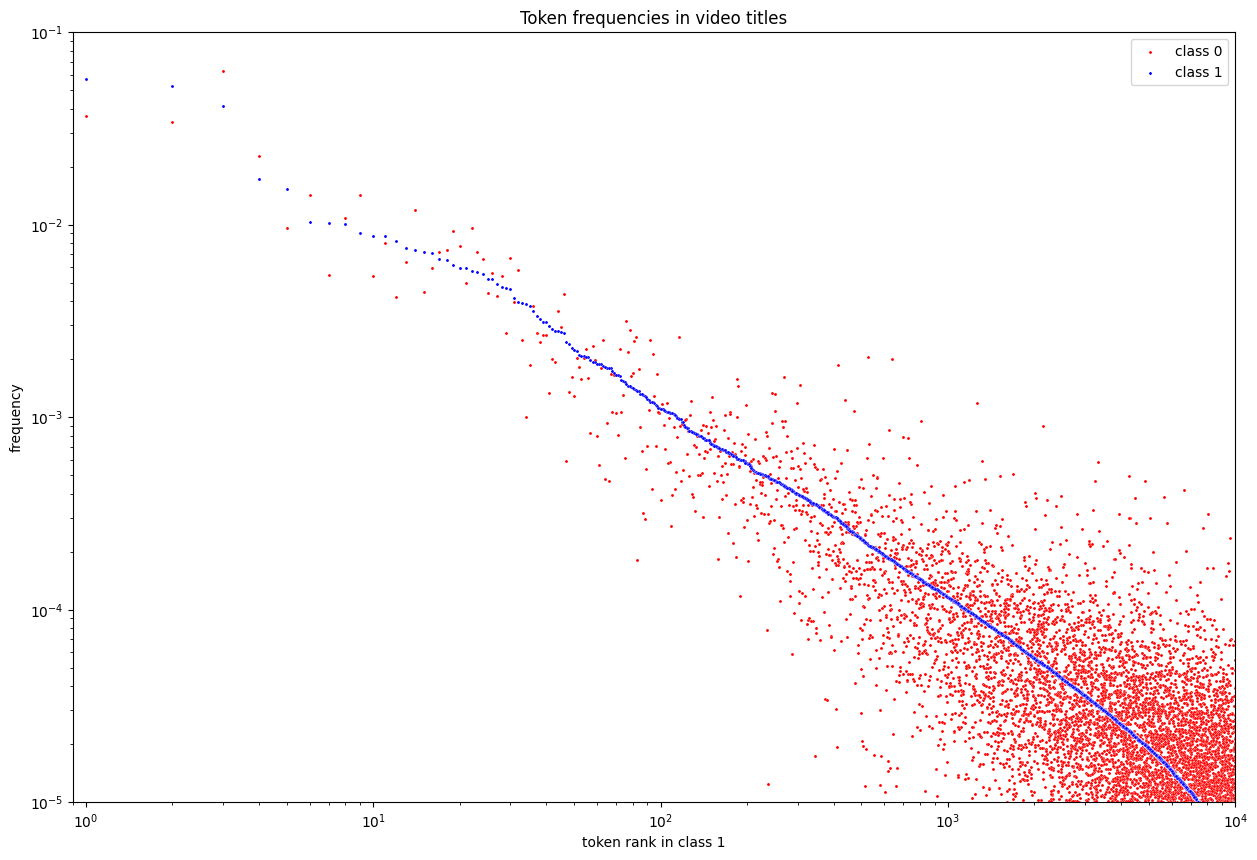

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

colors = ['r','b']

plt.figure(figsize=(15, 10))
plt.title('Token frequencies in video titles')
plt.xlabel('token rank in class 1')
plt.ylabel('frequency')

ax = [sns.scatterplot(x=ranks[1], y=mean_frequencies[label], color=colors[label], s=5, label=f'class {label}') for label in [0,1]]
for label in [0,1]:
    cursor = mplcursors.cursor(ax[label], hover=True)
    cursor.connect("add", lambda x: show_token(x, tokens_ranked))
    @cursor.connect("add")
    def show_token(sel):
        x,y = sel.target
        sel.annotation.set_text("hello?")

    ax[label].set_xscale('log')
    ax[label].set_yscale('log')
    ax[label].set_xlim(0.9, 1e+4)
    ax[label].set_ylim(1e-5, 1e-1)


plt.show()

We see a significant discrepancy in the token frequencies between class 0 and class 1. To understand how significant this discrepancy is, we can look at how consistent the token frequencies are *within* each class. I'll perform a fourfold split of each class and show the token frequencies for each split on the same plot:

In [66]:
from sklearn.model_selection import KFold

n_splits = 4
kf = KFold(n_splits=4, shuffle=True, random_state=42)
data_split = [[],[]]
for label in [0,1]:
    for fold, (_, test_index) in enumerate(kf.split(data[data['label']==label]), 1):
        data_split[label].append(data[data['label'] == label].iloc[test_index])


data_vectorized_split = [[data_vectorized[data_split[label][split].index, :] for split in range(n_splits)] for label in [0,1]]
mean_frequencies_split = [[np.ravel(data_vectorized_split[label][split].mean(axis=0)) for split in range(n_splits)] for label in [0,1]]

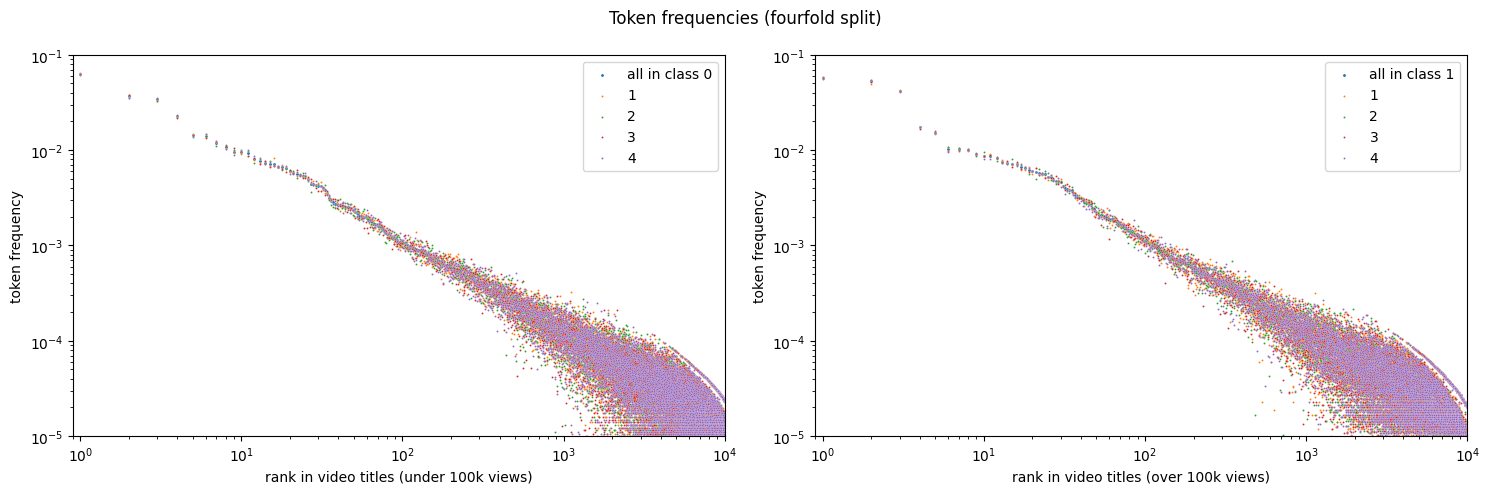

In [67]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
for label in [0,1]:
    sns.scatterplot(x=ranks[label], y=mean_frequencies[label], ax = axes[label], label=f'all in class {label}', s=5)
    for split in range(n_splits):
        sns.scatterplot(x=ranks[label], y=mean_frequencies_split[label][split], ax = axes[label], label=f'{split+1}', s=2)
        axes[label].set_xlabel(f"rank in video titles ({'over 100k views' if label == 1 else 'under 100k views'})")

    axes[label].set_ylabel('token frequency')
    axes[label].set_xscale('log')
    axes[label].set_yscale('log')
    axes[label].set_xlim(0.9, 1e+4)
    axes[label].set_ylim(1e-5, 1e-1)

fig.suptitle('Token frequencies (fourfold split)')
plt.tight_layout()
plt.show()

Remarkably, we see that the token frequencies within each class are highly consistent for the most frequently occurring tokens, but significant discrepancies appear for the less frequently occurring ones. This is a consequence of the central limit theorem (CLT): we can regard the frequency $f_i$ of each token for a particular video title $i$ as a random variable satisfying a probability distribution $p(f_i)$. The central limit theorem tells us that when the number of samples grows large, the mean of the frequencies satisfies a normal distribution, with the mean occurring at the mean of $p(f_i)$ and the standard deviation scaling as $\sigma\left[p\right]/\sqrt{N}$ with $N$ being the sample size. For the less frequent tokens, the standard deviation $\sigma \sim \sqrt{f_i}$ which can become significant in comparison to the mean frequency and therefore the spread appears larger when plotted on logarithmic axes (e.g. the CLT could explain a range of frequencies varying from $\sim 10^{-5}$ to $10^{-3}$ which would appear far more prominently than the same absolute variation centred around $\sim 0.1$).

If the CLT explains the tight clustering of the token frequencies in the plot of the fourfold split, then why is there a relatively large discrepancy in the most frequent tokens between class 0 and class 1? The answer is that the assumption of the CLT is that the random variables are independent: when we averaged the token frequencies within each class and compared them, we implicitly introduced a correlation between the data points, since we grouped them by a variable (the target label) that is correlated with the token frequencies. Thus the mean frequencies do not approach the mean frequency of the total dataset. What we have therefore obtained is evidence that the token frequencies are correlated with the target labels -- we can therefore conclude that the title of a video can be used as predictors of the video's future popularity.

Let's look at the most common tokens and their distributions within each class:

In [68]:
pd.set_option('display.max_rows', 500)

In [69]:
vocab_data = pd.DataFrame()
vocab_data['token'] = [tokenizer_decode([w]) for w in vocabulary]
vocab_data['mean frequency (over 100k views)'] = mean_frequencies[1]
vocab_data['mean frequency (under 100k views)'] = mean_frequencies[0]
vocab_data.sort_values(by='mean frequency (over 100k views)', axis=0, ascending=False).head(200)

,token,mean frequency (over 100k views),mean frequency (under 100k views)
14036,[|],0.056794,0.036668
14225,[#],0.052766,0.034036
11788,[science],0.041516,0.062852
4544,[-],0.017276,0.022646
11802,[class],0.015288,0.009623
11793,[of],0.010271,0.014216
11902,[physics],0.010189,0.005465
11739,[in],0.010096,0.010783
11789,[and],0.009056,0.014307
11907,[maths],0.008776,0.005416


We immediately see that, apart from the word 'science', which occurs with almost identical frequencies between the popular and unpopular datasets, all the other tokens exhibit significant discrepancies. The hashtag # occurs significantly more frequently in the popular dataset. Also more common is the symbol | indicating a split in the title (e.g. the presence of a subtitle or the name of the video series) as well as the word 'chapter.' These generally indicate that the video is part of a series. The popular dataset also features the word 'kids,' 'experiments', and 'project' in the title far more frequently than in the unpopular dataset.

This tells us one possible approach to developing a machine learn model that relates the video titles to the popularity: given the probability that a video with over 100k views features a certain keyword with a frequency $f$, we can use Bayes' theorem to calculate the probability that a video featuring that keyword with that frequency will gain over 100k views. I will explore some variation of this principle in the next notebook.

Let's now perform the same analysis for the video descriptions:

In [ ]:
tf_vectorizer = TfidfVectorizer(preprocessor= lambda x:x, tokenizer=lambda x:x, use_idf=False, norm='l1', token_pattern=None)
tf_vectorizer.fit(data['description_tokenized'])
vocabulary = tf_vectorizer.get_feature_names_out()
data_vectorized = tf_vectorizer.transform(data['description_tokenized']).tocsr()

data_vectorized_by_label = [data_vectorized[data[data['label']==label].index, :] for label in [0,1]]
mean_frequencies = [np.ravel(data_vectorized_by_label[label].mean(axis=0)) for label in [0,1]]

ranks = [[len(vocabulary)-np.argsort(mean_frequencies[label]).tolist().index(i) for i in range(len(mean_frequencies[label]))] for label in [0,1]]

colors = ['r','b']

plt.figure(figsize=(15, 10))
plt.title('Token frequencies in video descriptions')
plt.xlabel('token rank in class 1')
plt.ylabel('frequency')

ax = [sns.scatterplot(x=ranks[1], y=mean_frequencies[label], color=colors[label], s=5, label=f'class {label}') for label in [0,1]]
for label in [0,1]:
    ax[label].set_xscale('log')
    ax[label].set_yscale('log')
    ax[label].set_xlim(0.9, 1e+4)
    ax[label].set_ylim(1e-5, 1e-1)


plt.show()

In [ ]:
vocab_data = pd.DataFrame()
vocab_data['token'] = [tokenizer_decode([w]) for w in vocabulary]
vocab_data['mean frequency (over 100k views)'] = mean_frequencies[1]
vocab_data['mean frequency (under 100k views)'] = mean_frequencies[0]
vocab_data.sort_values(by='mean frequency (over 100k views)', axis=0, ascending=False).head(200)

Here we see some interesting new behaviour that was not apparent in the analysis of the video titles. The hashtag # has almost identical frequency in the two datasets, and the word 'science' is slightly less common for the more highly viewed videos. Tokens indicating the presence of a URL also appear significantly more frequently for the more highly viewed videos.

This correlation is interesting, since the full video description is generally only available on YouTube on the video page, so the descriptions can only be read in full when the video has been accessed. Thus the causal relation here would be weaker. One possible explanation is that better video descriptions lead to the videos being shared more often on other social media sites.

In the next notebook I will use these insights as a basis for constructing classical ML models based on NLP to classify videos by popularity.